In [27]:
import json
import os, sys
import numpy as np
import pandas as pd
from langdetect import detect_langs

import matplotlib.pyplot as plt

import seaborn as sns
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=False)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
train_path = os.path.join('..', 'dataset', 'train.jsonl')
test_path = os.path.join('..', 'dataset', 'test.jsonl')

In [3]:
# 读取数据
df_train = pd.read_json(train_path, lines=True)
# 展示数据
df_train

,text,label
0,S. cities. Here's more about Seattle's snowfa...,1
1,This paper delves into the interpretability a...,1
2,You could sell this toy to all your friends a...,1
3,"My time to shine . The term "" Rockefeller Rep...",0
4,This case raised several ethical and legal qu...,1
...,...,...
27995,Each letter of the alphabet is assigned to a ...,1
27996,That's because people need to make sure that ...,1
27997,"As a general rule, you must choose between a ...",0
27998,This can be used for international trade and ...,1


In [4]:
df_test = pd.read_json(test_path, lines=True)
df_test

,text
0,When you mention the “brilliant adaptation of...
1,The stores track the individual items for inv...
2,"Since I don’t have that information yet, I ca..."
3,"You live inside a person, which is like a big..."
4,"I agree, one should not let the tax tail wag ..."
...,...
2795,"The videos, taken by cameras on both the Pers..."
2796,"While this is speculative, I'll explore some ..."
2797,Massage therapist here ; Your muscles are mad...
2798,As someone who 's taking an interest in the t...


In [10]:
lang_detect('daijfj')

'lt'

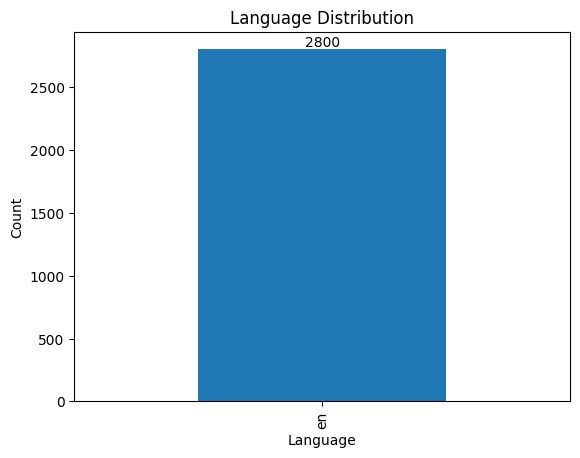

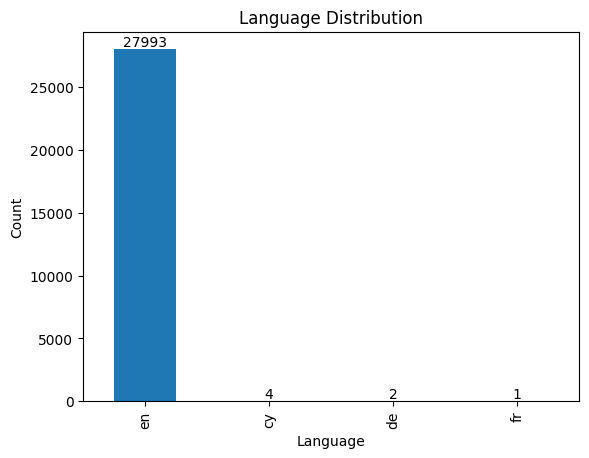

In [23]:
# 1. 统计数据中的语言分布
def lang_detect(text):
    try:
        return detect_langs(text)[0].lang
    except:
        return 'unknown'
    
# 测试数据语言分布，柱状图
df_test['lang'] = df_test['text'].parallel_apply(lang_detect)
# 柱状图，在顶部加上百分比
def plot_lang_distribution(df):
    lang_counts = df['lang'].value_counts()
    lang_counts.plot(kind='bar')
    for i, count in enumerate(lang_counts):
        plt.text(i, count, f'{count}', ha='center', va='bottom')
    plt.title('Language Distribution')
    plt.xlabel('Language')
    plt.ylabel('Count')
    plt.show()
plot_lang_distribution(df_test)

# 训练数据语言分布，柱状图
df_train['lang'] = df_train['text'].parallel_apply(lang_detect)
# 柱状图，在顶部加上百分比
plot_lang_distribution(df_train)

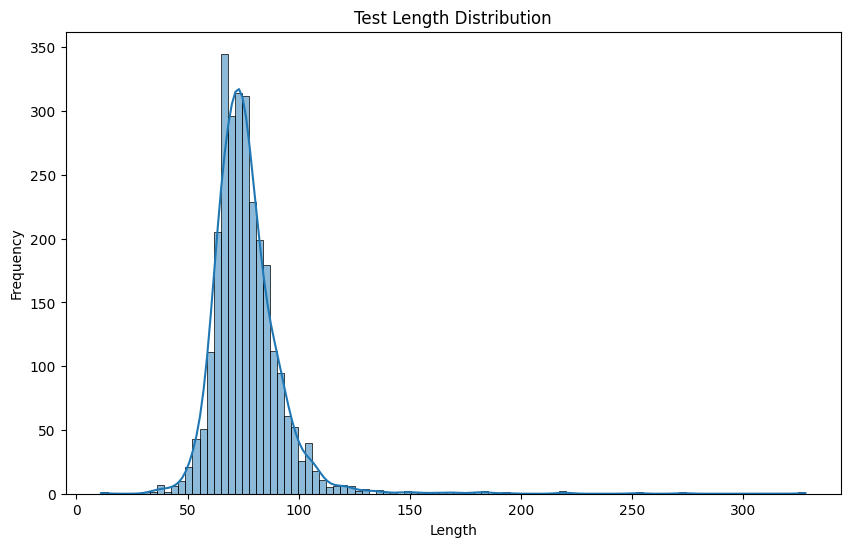

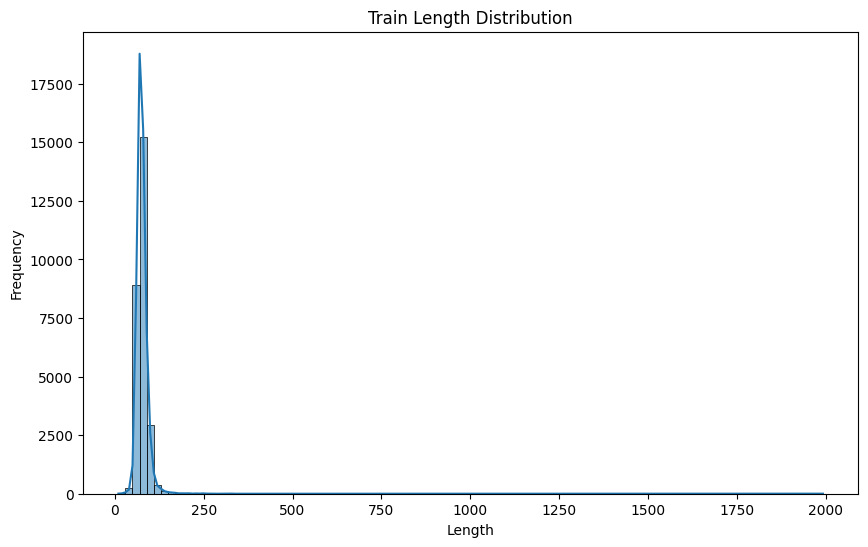

/tmp/ipykernel_11810/220000287.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['text'].str.split().str.len()


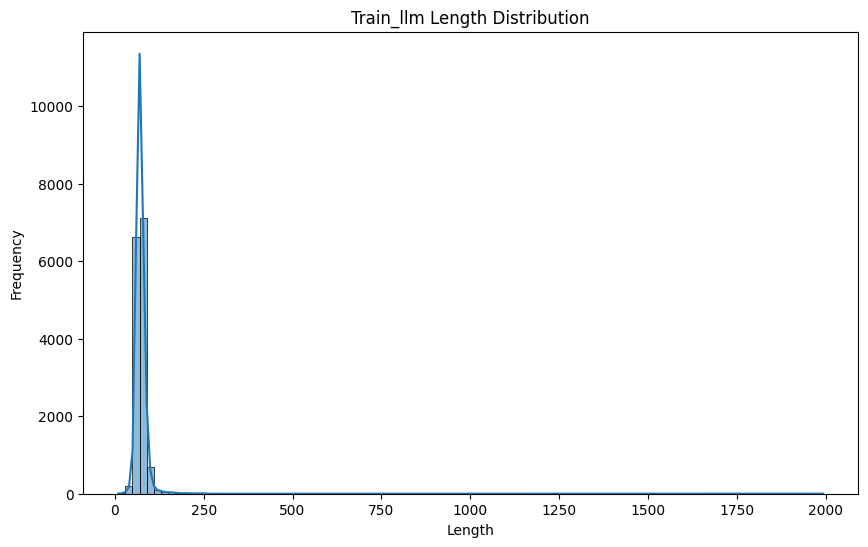

/tmp/ipykernel_11810/220000287.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['text'].str.split().str.len()


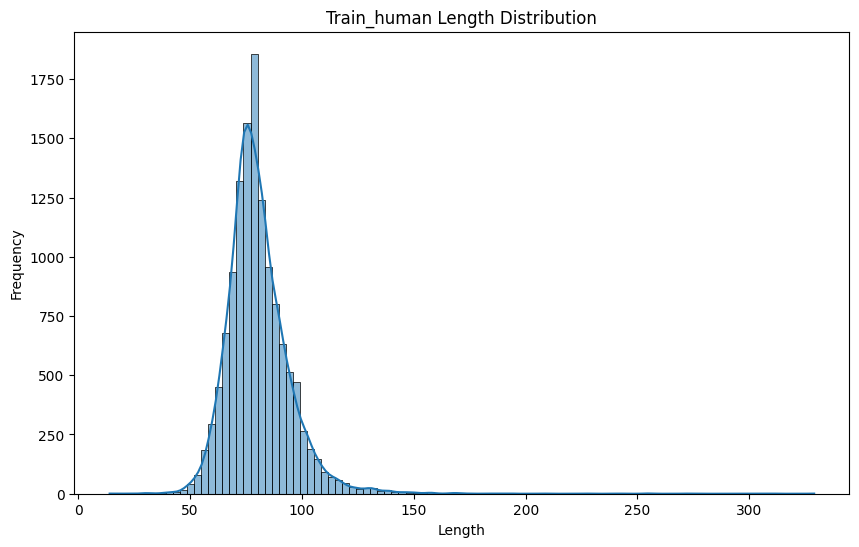

In [38]:
# 2. 统计训练数据长度分布
def plot_length_distribution(df, prefix='train'):
    # 计算文本单词长度
    df['length'] = df['text'].str.split().str.len()
    # 绘制直方图
    plt.figure(figsize=(10, 6))
    sns.histplot(df['length'], bins=100, kde=True)
    plt.title(f'{prefix.capitalize()} Length Distribution')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.show()
   

plot_length_distribution(df_test, prefix='test')
plot_length_distribution(df_train, prefix='train')

# 训练集合中标签为1的长度分布
df_train_llm = df_train[df_train['label'] == 1]
df_train_human = df_train[df_train['label'] == 0]

plot_length_distribution(df_train_llm, prefix='train_llm')
plot_length_distribution(df_train_human, prefix='train_human')